## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [1]:
# Add the imports here, I added few exemples. The library should be installed first
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. main directories </font >

In [76]:
# you can complete and should modify the "config" variable
config={"main_dir":"/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/",
"rawdata_dir":"/rawdata/",
"data_dir":"/derivatives/data/",

"session_names":["MA","MSL"],

 
"list_subjects":{"sub-001":{"sess01":"MSL","sess02":"MA"},
                 "sub-002":{"sess01":"MA","sess02":"MSL"},
                 "sub-003":{"sess01":"MSL","sess02":"MA"}},#,
                #"sub-004":{"sess01":"MA","sess02":"MSL"},
                #"sub-005":{"sess01":"MSL","sess02":"MA"},
                #"sub-006":{"sess01":"MA","sess02":"MSL"}},
 
"subjects_acq":{"sub-001":{"sess01":["RNDpre","MSL","RNDpost"],"sess02":["RNDpre","MA","RNDpost"]},
               "sub-002":{"sess01":["RNDpre","MA","RNDpost"],"sess02":["RNDpre","MSL","RNDpost"]},
               "sub-003":{"sess01":["RNDpre","MSL","RNDpost"],"sess02":["RNDpre","MA","RNDpost"]}}}#,
               #"sub-004":{"sess01":["RNDpre","MA","RNDpost"]},
               #"sub-005":{"sess01":["RNDpre","MSL","RNDpost"]},
               #"sub-006":{"sess01":["RNDpre","MA","RNDpost"]}}}

 ### <font color=#4424D6> II. select the file </font >

In [82]:
# subject loop
data={} # empty dictionnary
for subject_name in config["list_subjects"]:
    data[subject_name]={} #empty dict for each subject
    #session loop
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        data[subject_name][sess]={} #empty dict for each subject and session
        
        #loop for each run in a sesssion
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            # name of the file that contains all necessary information
            filename=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_trial.dat"
            
            # read the file using pandas library:
            data[subject_name][sess][run_name]=pd.read_csv(filename,delimiter=" ")


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Analyses

 ### <font color=#4424D6> I. Reaction time </font >

In [99]:
import numpy as np
# Calculate the reaction time

data_metrics={}# create empty dataframe
mean_bySeq={}
mean_byBlocks={}

#loop for each subjects --------------------
for subject_name in config["list_subjects"]:
    data_metrics[subject_name]={}# create empty dataframe
    mean_bySeq[subject_name]={}
    mean_byBlocks[subject_name]={}
    #loop for each session --------------------
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        data_metrics[subject_name][sess]={}# create empty dataframe
        mean_bySeq[subject_name][sess]={}
        mean_byBlocks[subject_name][sess]={}
        
        #loop for each run in a session --------------------
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            # name of the file that contains all necessary information
            data_metrics[subject_name][sess][run_name]={}# create empty dataframe
            data_metrics[subject_name][sess][run_name]["participant_ID"]=data[subject_name][sess][run_name]["subject"]
            data_metrics[subject_name][sess][run_name]["trial_nb"]=data[subject_name][sess][run_name]["trial"]
            data_metrics[subject_name][sess][run_name]["trialInSeq"]=data[subject_name][sess][run_name]["trialInSeq"]
            data_metrics[subject_name][sess][run_name]["seqInBlock"]=data[subject_name][sess][run_name]["seqInBlock"]
            data_metrics[subject_name][sess][run_name]["seq_nb"]=[None] * len(data[subject_name][sess][run_name])
            data_metrics[subject_name][sess][run_name]["block_nb"]=data[subject_name][sess][run_name]["block"]
            data_metrics[subject_name][sess][run_name]["t_onset_target"]=data[subject_name][sess][run_name]["t.init"]
            data_metrics[subject_name][sess][run_name]["t_hit_target"]=data[subject_name][sess][run_name]["t.hit"]
            
            data_metrics[subject_name][sess][run_name]["RT"]=[None] * len(data[subject_name][sess][run_name])
            
            
            # create a sequence number array, starting from 0 and repeated 8 times (for 8 items in a sequence)
            sequence = []
            for j in range(len(data[subject_name][sess][run_name]["t.init"])):
                number = j
                sequence.extend([number] * 8)
                number += 1

             #loop for each trials --------------------
            for i in range(0,len(data[subject_name][sess][run_name]["t.init"])):
                RT=data[subject_name][sess][run_name]["t.hit"][i]-data[subject_name][sess][run_name]["t.init"][i]
                if RT >=0.7:
                    RT=np.nan
                data_metrics[subject_name][sess][run_name]["RT"][i]=RT
                data_metrics[subject_name][sess][run_name]["seq_nb"][i]=sequence[i]
            
            data_metrics[subject_name][sess][run_name]["RT"]=pd.to_numeric(data_metrics[subject_name][sess][run_name]["RT"], errors='coerce')
            data_metrics[subject_name][sess][run_name]=pd.DataFrame(data_metrics[subject_name][sess][run_name])
            
            # Create a data frame by sequence
            mean_bySeq[subject_name][sess][run_name] = pd.DataFrame(data_metrics[subject_name][sess][run_name][data_metrics[subject_name][sess][run_name]["trialInSeq"]!=0].groupby('seq_nb')['RT'].mean()).reset_index()
            mean_bySeq[subject_name][sess][run_name] = pd.DataFrame(data_metrics[subject_name][sess][run_name].groupby('seq_nb')['RT'].mean()).reset_index()
            mean_byBlocks[subject_name][sess][run_name] = pd.DataFrame(data_metrics[subject_name][sess][run_name].groupby('block_nb')['RT'].mean()).reset_index()
            
            duration_sq=[]
            for sequence_nb in range(0,data_metrics[subject_name][sess][run_name]["seq_nb"].iloc[-1]+1):
                duration_sq.append(data_metrics[subject_name][sess][run_name]["t_onset_target"][(data_metrics[subject_name][sess][run_name]["seq_nb"]==sequence_nb) & (data_metrics[subject_name][sess][run_name]["trialInSeq"]==7)].values[0]-data_metrics[subject_name][sess][run_name]["t_onset_target"][(data_metrics[subject_name][sess][run_name]["seq_nb"]==sequence_nb) & (data_metrics[subject_name][sess][run_name]["trialInSeq"]==0)].values[0])
            mean_bySeq[subject_name][sess][run_name]["duration"]=duration_sq
            
            duration_block=[]
            for block_nb in range(0,data_metrics[subject_name][sess][run_name]["block_nb"].iloc[-1]+1):
                duration_block.append(data_metrics[subject_name][sess][run_name]["t_onset_target"][(data_metrics[subject_name][sess][run_name]["block_nb"]==block_nb) & (data_metrics[subject_name][sess][run_name]["seqInBlock"]==data_metrics[subject_name][sess][run_name]["seqInBlock"].iloc[-1])].values[0]-data_metrics[subject_name][sess][run_name]["t_onset_target"][(data_metrics[subject_name][sess][run_name]["block_nb"]==block_nb) & (data_metrics[subject_name][sess][run_name]["seqInBlock"]==0)].values[0])
            
            mean_byBlocks[subject_name][sess][run_name]["duration"]=duration_block
       
    

 ### <font color=#4424D6> II. Create a dataframe for all participants</font >

In [98]:
data_metrics[subject_name][sess][run_name]["RT"]

TypeError: unhashable type: 'list'

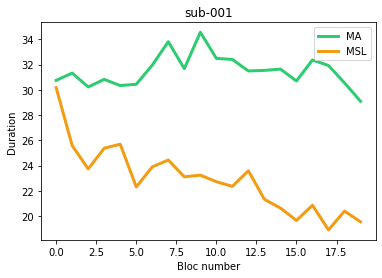

In [84]:
plt.plot(mean_byBlocks["sub-001"]["MA"]["MA"]["block_nb"],mean_byBlocks["sub-001"]["MA"]["MA"]["duration"],color= "#2ecc71", linewidth=3,label='MA')
plt.plot(mean_byBlocks["sub-001"]["MSL"]["MSL"]["block_nb"],mean_byBlocks["sub-001"]["MSL"]["MSL"]["duration"],color= "#f39c12", linewidth=3,label='MSL')
plt.xlabel('Bloc number')
plt.ylabel('Duration')
plt.title('sub-001')
plt.legend()

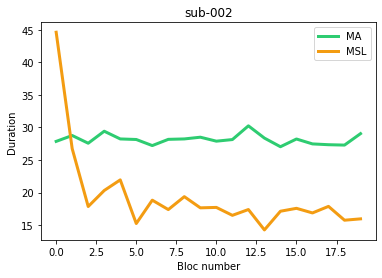

In [85]:
plt.plot(mean_byBlocks["sub-001"]["MA"]["MA"]["block_nb"],mean_byBlocks["sub-002"]["MA"]["MA"]["duration"],color= "#2ecc71", linewidth=3,label='MA')
plt.plot(mean_byBlocks["sub-001"]["MSL"]["MSL"]["block_nb"],mean_byBlocks["sub-002"]["MSL"]["MSL"]["duration"],color= "#f39c12", linewidth=3,label='MSL')
plt.xlabel('Bloc number')
plt.ylabel('Duration')
plt.title('sub-002')
plt.legend()

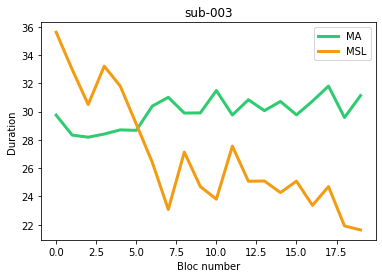

In [86]:
plt.plot(mean_byBlocks["sub-001"]["MA"]["MA"]["block_nb"],mean_byBlocks["sub-003"]["MA"]["MA"]["duration"],color= "#2ecc71", linewidth=3,label='MA')
plt.plot(mean_byBlocks["sub-001"]["MSL"]["MSL"]["block_nb"],mean_byBlocks["sub-003"]["MSL"]["MSL"]["duration"],color= "#f39c12", linewidth=3,label='MSL')
plt.xlabel('Bloc number')
plt.ylabel('Duration')
plt.title('sub-003')
plt.legend()

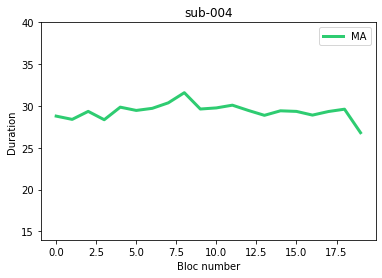

In [334]:
plt.plot(mean_byBlocks["sub-004"]["MA"]["MA"]["block_nb"],mean_byBlocks["sub-004"]["MA"]["MA"]["duration"],color= "#2ecc71", linewidth=3,label='MA')
plt.xlabel('Bloc number')
plt.ylabel('Duration')
plt.title('sub-004')
plt.ylim([14, 40])
plt.legend()

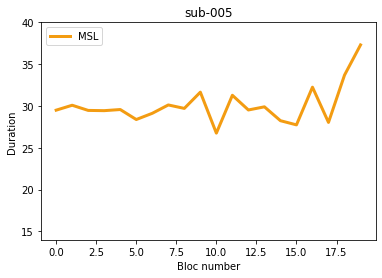

In [335]:
plt.plot(mean_byBlocks["sub-005"]["MSL"]["MSL"]["block_nb"],mean_byBlocks["sub-005"]["MSL"]["MSL"]["duration"],color= "#f39c12", linewidth=3,label='MSL')
plt.xlabel('Bloc number')
plt.ylabel('Duration')
plt.title('sub-005')
plt.ylim([14, 40])
plt.legend()

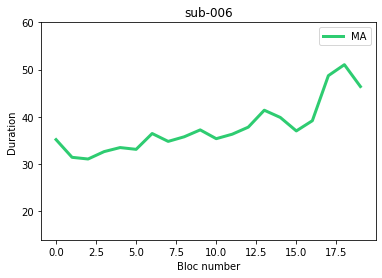

In [338]:
plt.plot(mean_byBlocks["sub-006"]["MA"]["MA"]["block_nb"],mean_byBlocks["sub-006"]["MA"]["MA"]["duration"],color= "#2ecc71", linewidth=3,label='MA')
plt.xlabel('Bloc number')
plt.ylabel('Duration')
plt.title('sub-006')
plt.ylim([14, 60])
plt.legend()

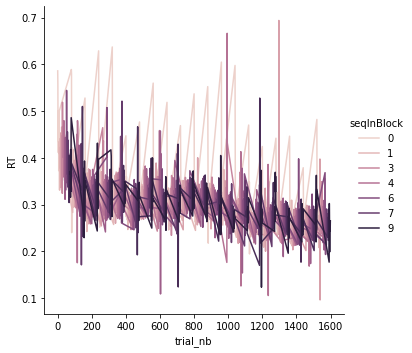

In [147]:
sns.relplot(x="trial_nb", y="RT",hue="seqInBlock",data=data_metrics[subject_name]["MA"]["MA"],kind="line")

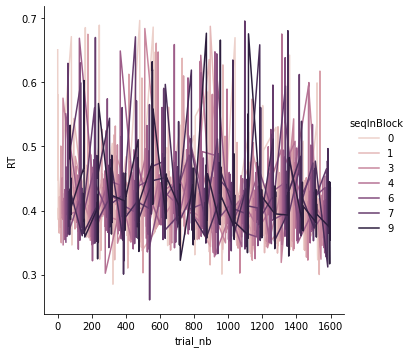

In [122]:
sns.relplot(x="trial_nb", y="RT",hue="seqInBlock",data=data_metrics[subject_name]["MSL"]["MSL"],kind="line")

In [ ]:
#sns.relplot(x="seq_nb", y="RT",data=mean_bySeq[subject_name]["MA"]["MA"],kind="line")

In [22]:
filename={};movement_filter_df={};dataframe_filename={}
for subject_name in config["list_subjects"]:
    filename[subject_name]={};movement_filter_df[subject_name]={};dataframe_filename[subject_name]={}
    
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        filename[subject_name][sess]={};movement_filter_df[subject_name][sess]={};dataframe_filename[subject_name][sess]={}
        
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:
            dataframe_filename[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement.csv"
            movement_filter_df[subject_name][sess][run_name]=data.filter_movement(movement_df[subject_name][sess][run_name],output_file=dataframe_filename[subject_name][sess][run_name])

 ### <font color=#4424D6> III. Plot rawdata </font >

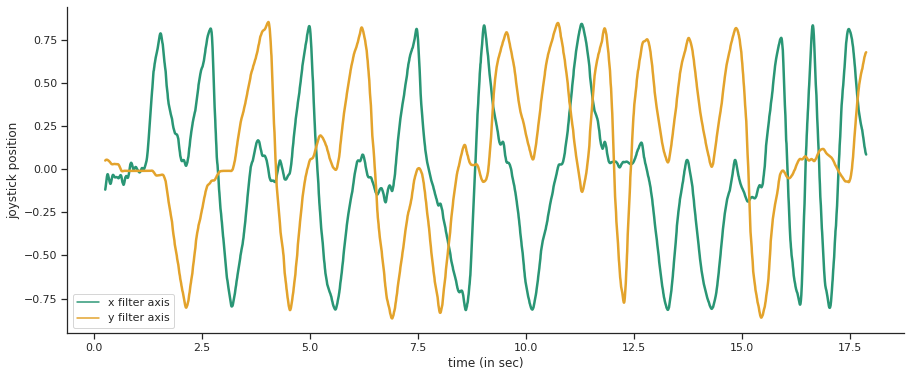

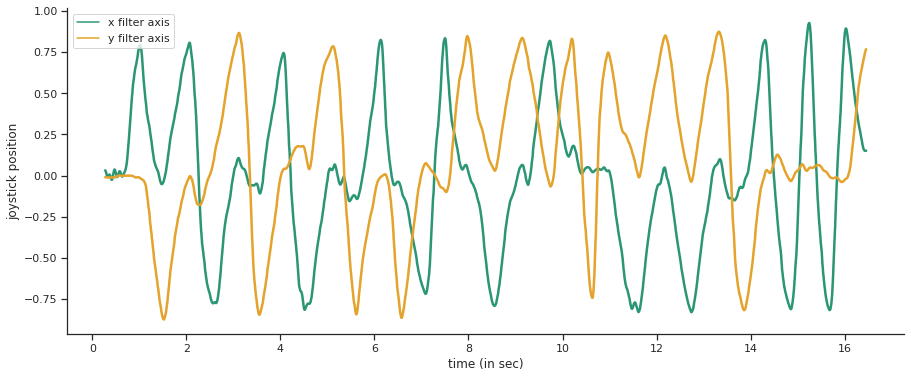

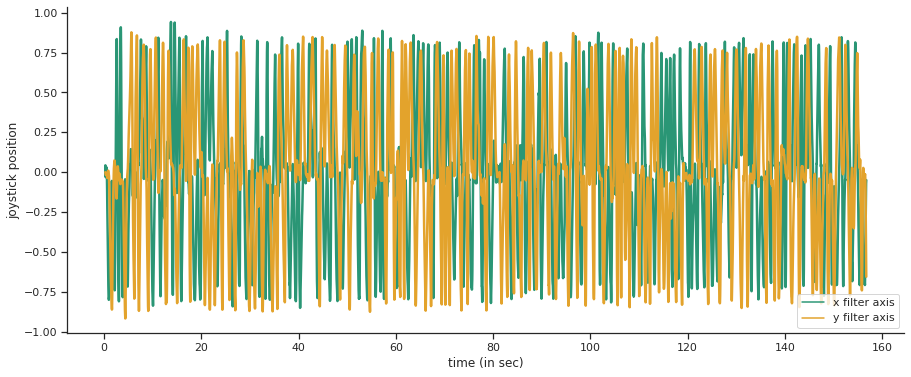

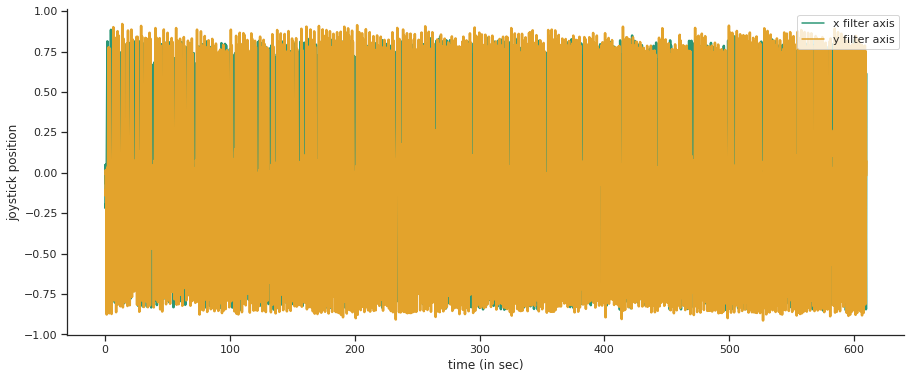

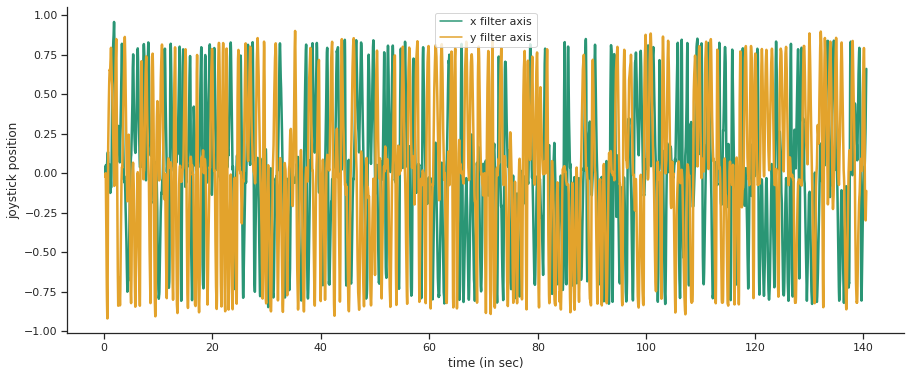

In [23]:
for subject_name in config["list_subjects"]:
    for sess_nb in range(0,1):#len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:
            plot_filename=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement_raw.png"
            #print(sess + " " + run_name)
            data.plot_movement(subject_name,
                               movement_df[subject_name ][sess][run_name][100:],
                               sample_rate=0.0025,
                               save_plot=True,
                               plot_filename=plot_filename)